In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from scipy.stats import linregress
import scipy.stats as st

In [32]:
# Read the mouse data and the study results
all_census_data= pd.read_csv("all_census_data.csv")
all_census_data.head()

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count,Move In,Move Out,Delta
0,2013,California,6,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0,485477.0,581679.0,-96202.0
1,2013,Colorado,8,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0,206543.0,166348.0,40195.0
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0,529406.0,423995.0,105411.0
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0,61592.0,63788.0,-2196.0
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0,143841.0,111680.0,32161.0


In [31]:
# Add a Poverty Rate Column
all_census_data["Poverty Rate"] = 100 * all_census_data["Poverty Count"].astype(int)/all_census_data["Population"].astype(int)

In [20]:
# Filter to California only
California = all_census_data.loc[all_census_data["State Name"]=="California"]
California

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,...,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count,Move In,Move Out,Delta,Poverty Rate
0,2013,California,6,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,...,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0,485477.0,581679.0,-96202.0,15.628107
6,2014,California,6,38066920.0,29906.0,6115244.0,33.8,28.3,11.3,16529777.0,...,38066920.0,23650913.0,2262323.0,287360.0,5130536.0,2084564.0,513968.0,593308.0,-79340.0,16.064457
12,2015,California,6,38421464.0,30318.0,6135142.0,33.7,27.3,11.2,16869052.0,...,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,1891081.0,514477.0,643710.0,-129233.0,15.968007
18,2016,California,6,38654206.0,31458.0,6004257.0,33.4,26.5,11.1,17193695.0,...,38654206.0,23680584.0,2261835.0,285512.0,5354608.0,1683726.0,514758.0,657690.0,-142932.0,15.533257
24,2017,California,6,38982847.0,33128.0,5773408.0,33.1,25.9,11.0,17589758.0,...,38982847.0,23607242.0,2263222.0,292018.0,5503672.0,1491146.0,523131.0,661026.0,-137895.0,14.810124
30,2018,California,6,39148760.0,35021.0,5487141.0,32.8,25.5,11.0,17904213.0,...,39148760.0,23529068.0,2267875.0,296475.0,5604339.0,1321502.0,501023.0,691145.0,-190122.0,14.016130


# Population in CA 2013-2018

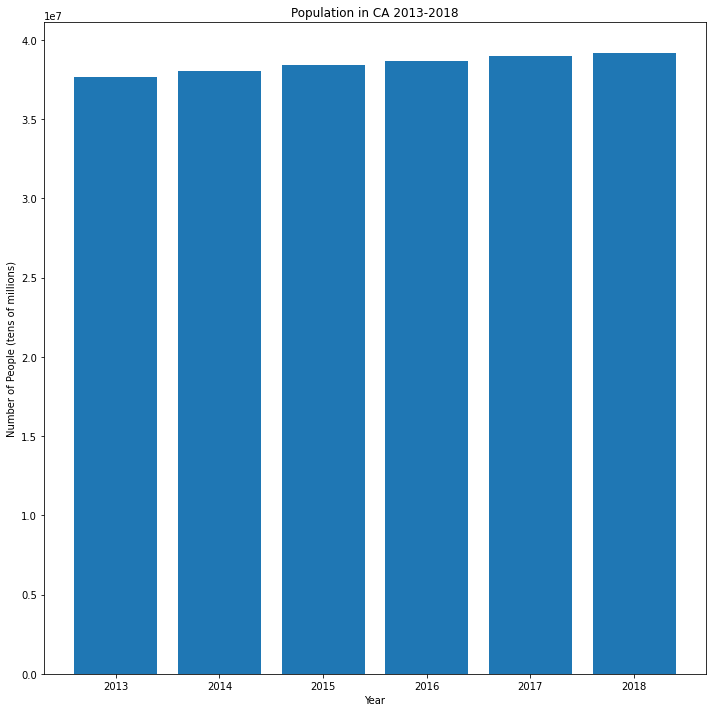

In [40]:
# assign x tick values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set figure size
plt.figure(figsize=(10,10))

# create bar graph for population in CA
plt.bar(x_axis, California["Population"])

# Set x-axis label, y-axis label, title, and legend for the bar graph
plt.xticks(tick_locations, California["Year"])
plt.title("Population in CA 2013-2018")
plt.xlabel("Year")
plt.ylabel("Number of People (tens of millions)")

# Save as png file 
plt.savefig("Images/CAPopulation.png")

# Show fig
plt.tight_layout()
plt.show()

 - Over the years, population has been increasing.

# Migration In and Out of CA 2013-2018

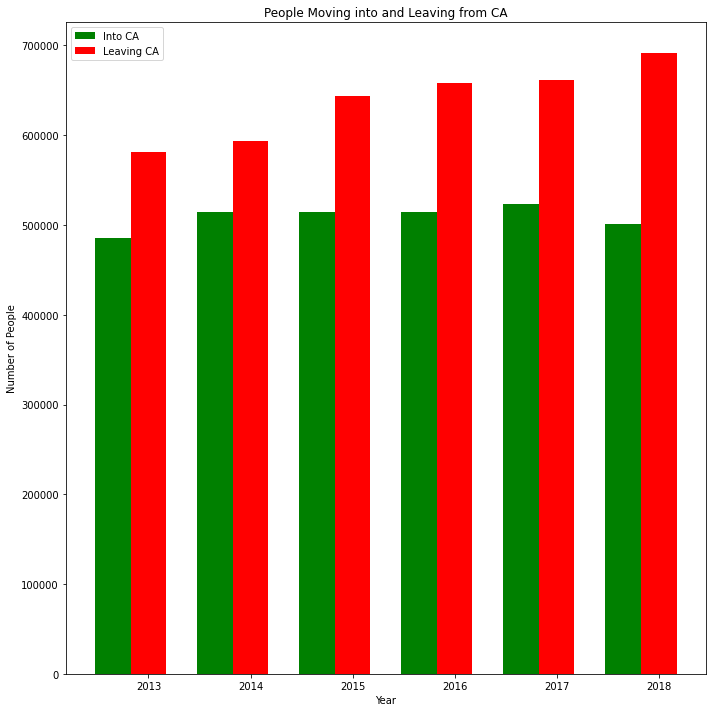

In [41]:
# Set the label and width for the bar chart
width = 0.35
bars1 = California["Move In"]
bars2 = California["Move Out"]

# Assign height and width of bars
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,10))
fig1 = ax.bar(r1, bars1, width, color = "green", label = "Into CA")
fig2 = ax.bar(r2, bars2, width, color = "red", label = "Leaving CA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Number of People")
ax.set_xlabel("Year")
ax.set_title("People Moving into and Leaving from CA")
plt.xticks([r + width for r in range(len(bars1))], ['2013', '2014', '2015', '2016', '2017', '2018'])
ax.legend()

# Save as png file 
plt.savefig("Images/CAMigration.png")

# Show fig
fig.tight_layout()
plt.show()

- Even though, population in the overall state has been increasing, more people over the years have been moving out of CA.

# Per Capita Income 

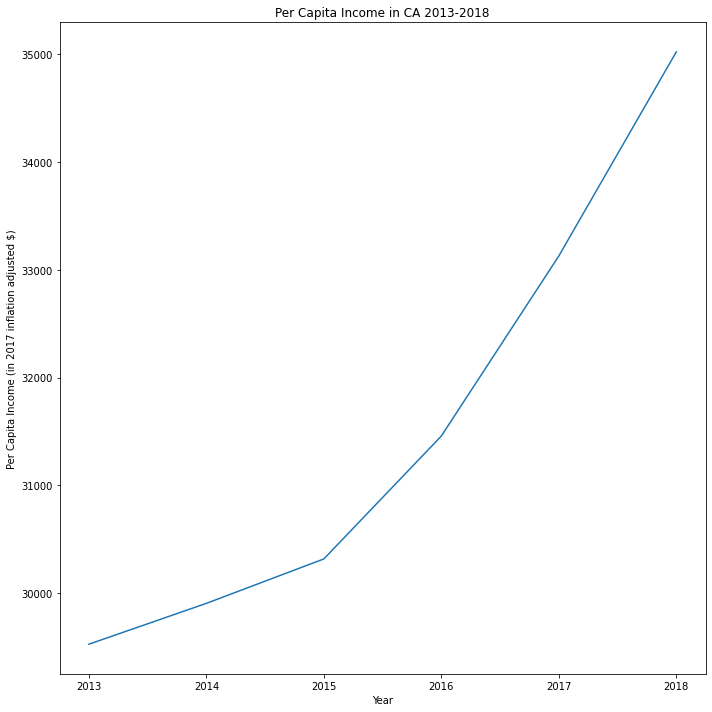

In [42]:
# assign tick locations for x values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set fig size 
plt.figure(figsize=(10,10))

# plot line graph
plt.plot(x_axis, California["Per Capita Income"])

# Set x-axis label, y-axis label, and title for the line graph
plt.xticks(tick_locations, California["Year"])
plt.title("Per Capita Income in CA 2013-2018")
plt.xlabel("Year")
plt.ylabel("Per Capita Income (in 2017 inflation adjusted $)")

# Save as png file 
plt.savefig("Images/PerCapitaIncome.png")

# show fig
plt.tight_layout()
plt.show()

- Per Capita Income is used to evaluate the standard of living and qualify of life. It is calculated by Income divided by Population. Even though the Per Capita Income is increasing it does not neccessarily mean that the standard of living is increasing as well. The Per Capita Income does not take into account inflation changes over the years. The Census calculated these numbers using the 2017 inflation adjusted numbers.

# Poverty Rate

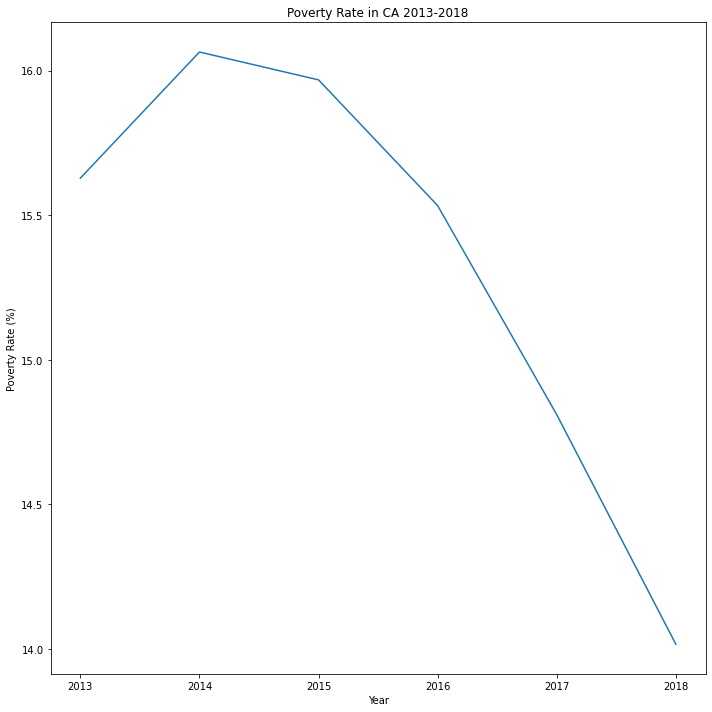

In [43]:
# assign tick locations for x values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set figure size 
plt.figure(figsize=(10,10))

# plot line graph
plt.plot(x_axis, California["Poverty Rate"])

# Set x-axis label, y-axis label, and title for the line graph
plt.xticks(tick_locations, California["Year"])
plt.title("Poverty Rate in CA 2013-2018")
plt.xlabel("Year")
plt.ylabel("Poverty Rate (%)")

# Save as png file 
plt.savefig("Images/PovertyRate.png")

# show fig
plt.tight_layout()
plt.show()

- Poverty Rate has been decreasing over the years but it could be indicator of change in inflation. 

# Per Capita Income vs Poverty Rate

The r-squared is: 0.9103035368503318
The pvalue is: 0.0031120944920132745


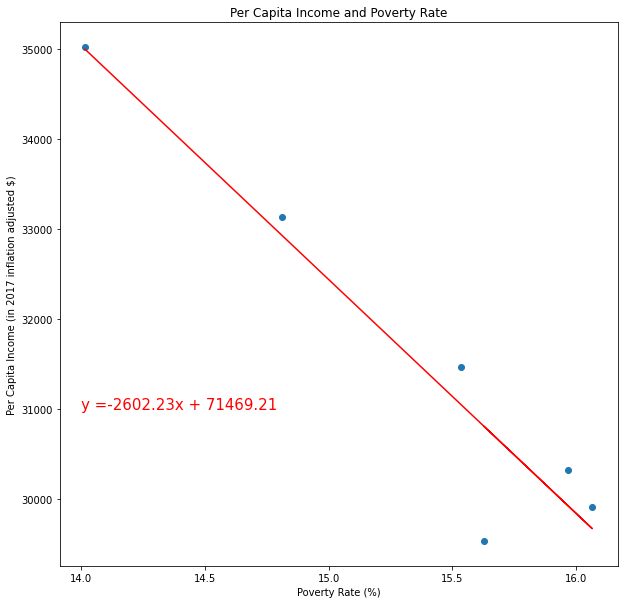

In [44]:
# set figure size 
plt.figure(figsize=(10,10))

# assign x and y values 
x_values = California["Poverty Rate"]
y_values = California["Per Capita Income"]

# calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) +"x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# add annotation, title, and labels for the scatter plot
plt.annotate(line_eq, (14,31000), fontsize= 15, color="red")
plt.title("Per Capita Income and Poverty Rate")
plt.ylabel("Per Capita Income (in 2017 inflation adjusted $)")
plt.xlabel("Poverty Rate (%)")

# print r-squared and p-value 
print(f"The r-squared is: {rvalue**2}")
print(f"The pvalue is: {pvalue}")

# Save as png file 
plt.savefig("Images/PerCapitaPoverty.png")

# Show fig 
plt.show()

- Per Capita Income and Poverty Rate are negatively strongly correlated and significant. This is shown from the r-squared value which is .91 and the p-value that is less than .05. 